# Introduction to Regression with Neural Networks in Tensoflow



In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit


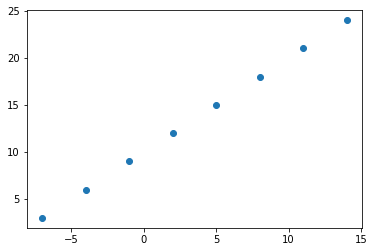

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X,y);

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction prooblem
house_info = tf.constant(["bedroom", "bathrooom", "garage"])
house_price = tf.constant([6868594])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathrooom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([6868594], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X.ndim

1

In [ ]:
# turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

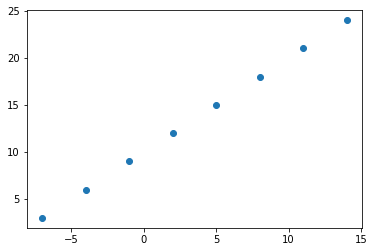

In [ ]:
plt.scatter(X, y)

## Steps in modeling with tensorflow

1, **Creating a model**- define input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function ( in other words, the function which tell our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X and y (features and labels)


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 518ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
# Check out X and y
X, y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# try and make a prediction using our trained model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improve our model
We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (given the model more examples to learn from).

In [ ]:
import tensorflow as tf
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 301ms/step - loss: 15.6751 - mae: 15.6751
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 15.3939 - mae: 15.3939
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 15.1126 - mae: 15.1126
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 14.8763 - mae: 14.8763
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 14.7438 - mae: 14.7438
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 14.6113 - mae: 14.6113
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 14.4788 - mae: 14.4788
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 14.3463 - mae: 14.3463
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 14.2138 - mae: 14.2138
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 14.0813 - mae: 14.0813
Epoch 11/100
1/1 [==============================] - 0s 5m

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

array([[29.97939]], dtype=float32)

In [ ]:
# Let's see if we can make another change to improve our model
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 354ms/step - loss: 13.9757 - mae: 13.9757
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3927 - mae: 13.3927
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.8174 - mae: 12.8174
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.2473 - mae: 12.2473
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.6788 - mae: 11.6788
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1090 - mae: 11.1090
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5356 - mae: 10.5356
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.9562 - mae: 9.9562
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3680 - mae: 9.3680
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7683 - mae: 8.7683
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 8

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction
model.predict([17.])

array([[26.96912]], dtype=float32)

# Evaluating a model
'''
In practice, a typical workflow you'll go through when building a neural network is:

Build a model --> fit it -> evaluate it --> twesk a model --> fit it --> evaluate it ==> twesk a model --> fit it --> evaluate it...

'''



When it comes to evaluation... there are 3 words you should memorise:
>"Visuaize, visualize, visualize"

it's a good idea to visualize
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of a the model- how do the predictions of a model line up against the ground truth (the original labels)


In [ ]:
import tensorflow as tf
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

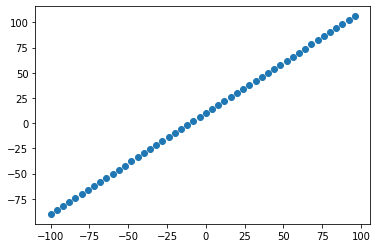

In [ ]:
# visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### Three sets...

* **training set**- the model learns from this data, which is typically 70 - 80% of the total data you have available.
* v**alidation set** - the model get tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available 

In [ ]:
# Check the length of how many sample we have
len(X)

50

In [ ]:
# Split the data into train and test split
X_train = X[:40] # first 40 are training samples(80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20$ of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)



(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!


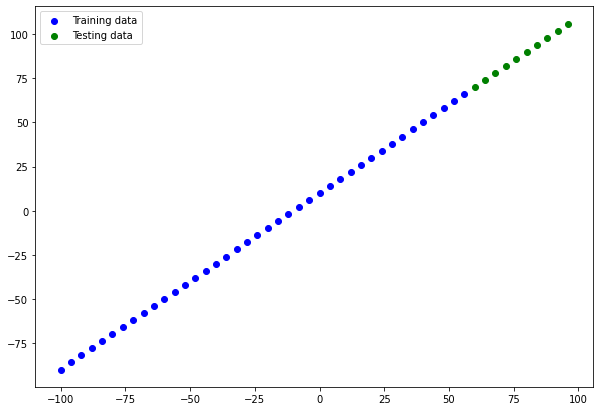

In [ ]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# show a legeng
plt.legend();

In [ ]:

# # Let's have a look at how to build a neural network for our data

# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])

# # 2. Compile the model
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["mae"])

# # # Fitting the model
# # model.fit(X_train, y_train, epochs=100)



In [ ]:
# # Visualizing the model
# model.summary()

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create a model which builds automatically by defining  the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create model (smae as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="outpur_layer")
], name="my_model_1")

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [ ]:
model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 outpur_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable param - these parameters aren't updated during training (this is a typical when you bring in already learn pattern or parameters from other models during **transfer learning**)

**Exercise** try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary`
 

In [ ]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 outpur_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


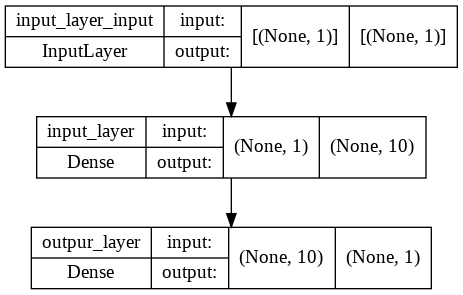

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing model's predictions

to visualize predictions, it's a good idea  to plot them against the ground truth labels.

often you'll see this from in the form of y_test or y_true versus y_pred (ground truth versus your model's prediction)


In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
import matplotlib.pyplot as plt
# Let's build a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictons to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data" )
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions" )
  # show the legend
  plt.legend() 


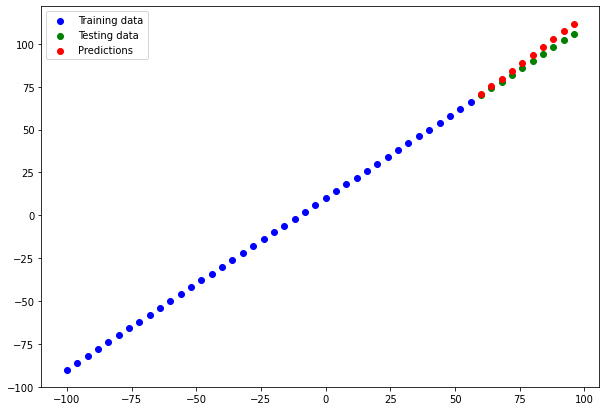

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evalulating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average how wrong is each of my model's predictions"
* MSE - mean square error,  " square the average errors"


In [ ]:
# Evaluate the model on test set
model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 135ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.keras.losses.mae(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> twesk it -> fit it -> evaluate it ->........

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find pattern in the data.

let't do 3 modelling experimants
1. `model_1` same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4.
5.


**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

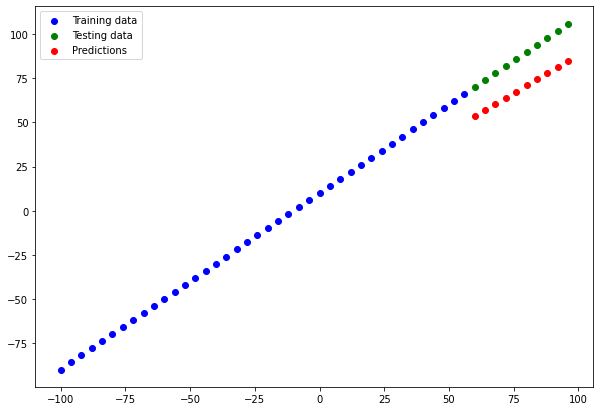

In [ ]:
# Make a plot prediction with model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
 y_preds_1.shape

(10, 1)

In [ ]:
y_test.shape

TensorShape([10])

In [ ]:
tf.constant(y_preds_1), #tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,)

**Build 2nd model**
* 2 dense layers, trained for 100 epochs

In [ ]:
# set ransom seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


NameError: ignored

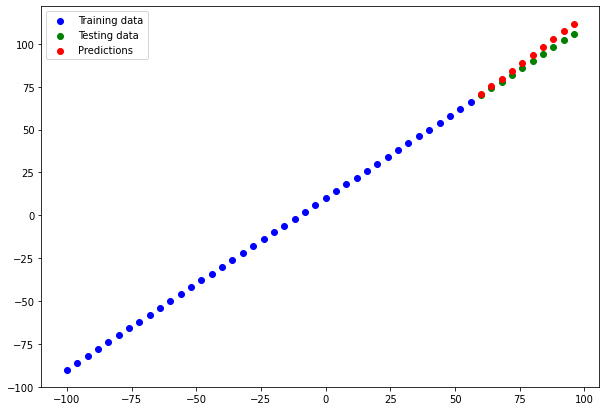

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build mode_3**

* 2 layers trained for 500 epochs


In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 5ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 7ms/

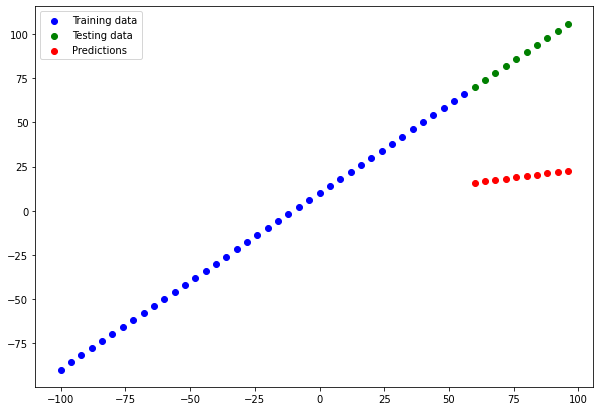

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

**note** you want to start with small experiments (small models) and make sure they work and then increase their scale when needed.

## Comparing the results of the experiments done

In [ ]:
# Let's compare our model's results using a pandas DataFrmae
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results =  pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


model 2 seems to have performed the best

In [ ]:
model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 outpur_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note** one of our main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure our which don't work and  in turn, get closer to figuring out what does work. Rememeber the machine learning practitioner's motto:"experiment, experiment, experiment".

## Tracking your experiments
One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:


* TensorBoard - a component of the TensorFlow library to help track  modeling experiments (we'll see this one later).
* Weights and Biases = a tool for all of kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our models to:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model


In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model prediction
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Comapare the MAE of model_2 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in a model  using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Doawnload a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "file" tab and right click on the file you're after and click "download".
2. Use code (see the call below)
3. Save it to Google Drive by connecting Google Drive and copying it there. (see second code cell below)


In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course/nn_regression

In [ ]:
!ls /content/drive/MyDrive/tensorflow_course/nn_regression

best_model_HDF5_format.h5


## A larger example

In [ ]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
 # Create X & y values (features and labels)

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

 

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create trining and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
from tensorflow.python.eager.monitoring import Metric
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()


(9575.4421, 13346.089736364485)

Right now it looks like our model isn't perfomring too well... let's try to improve our model.

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer (200 epochs)
3. (insert your own experiment here)


In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
 # Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3215.8608 - mae: 3215.8608


[3215.86083984375, 3215.86083984375]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'epochs')

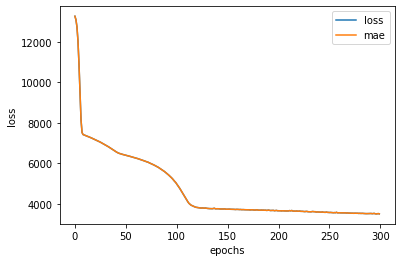

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question** How long should you train for???

answer: it depends on the problem you're working on. however, Tensorflow has a solution. It's called the Earlystopping callback.
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

it is a tensorflow component you can add to your model to stop your model to stop training once it stops improving a certain metric

## Preprocessing data (normalization and standerdization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which works better.

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


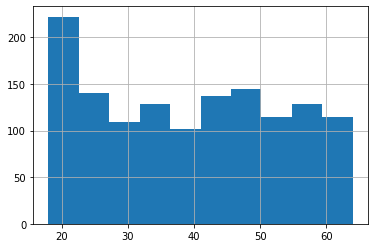

In [ ]:
X["age"].hist()

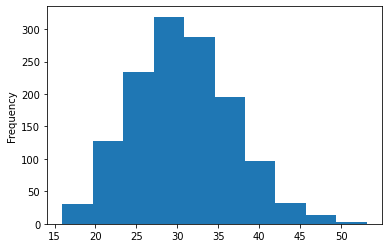

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])

)

# Create X & y 
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our trian  and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the columnn transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes

In [ ]:
# Build a neural network model to fit our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])



# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11925.96

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5771 - mae: 3171.5771


[3171.5771484375, 3171.5771484375]

In [ ]:
# insurance_model_2 result
# 9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477
# [4924.34765625, 4924.34765625]